In [76]:
## Needed libs
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import time

def request_sample_productions_grammar(payload):
    headers = {'Content-type': 'application/json'}
    response = requests.post("http://localhost:8080/api/get/grammar/pattern/withLimits", headers=headers,
                             data=json.dumps(payload))
    if response.status_code == 200:
        # takes response as json
        return response.json()


In [77]:
timeVariableTerminalsMean = []
timeVariableNonTerminalsMean = []
timeVariableTerminalsMedian = []
timeVariableNonTerminalsMedian = []
timeBothVariableMean = []
timeBothVariableMedian = []
productionsVariableTerminals = []
productionsVariableNonTerminals = []
productionsVariableBoth = []
start = 0
end = 0
amount_of_grammars = 26

for i in range(amount_of_grammars):
    tmpValues1 = []
    tmparr = []
    for j in range(50):
        start = time.time()
        grammarexp = json.dumps(request_sample_productions_grammar({"countTerminals": 3,"countNonTerminals": i+1}))
        grammar = json.loads(grammarexp)
        end = time.time()
        c = len(grammar['productions'])
        tmparr.append(c)
        tmpValues1.append(end-start)

    tmp = np.mean(tmpValues1)
    timeVariableNonTerminalsMean.append(tmp)
    tmp = np.median(tmpValues1)
    timeVariableNonTerminalsMedian.append(tmp)
    tmp = np.mean(tmparr)
    productionsVariableNonTerminals.append(tmp)

    tmpValues2 = []
    tmparr = []
    for j in range(50):
        start = time.time()
        grammarexp = json.dumps(request_sample_productions_grammar({"countTerminals": i+1,"countNonTerminals": 3}))
        grammar = json.loads(grammarexp)
        end = time.time()
        c = len(grammar['productions'])
        tmparr.append(c)
        tmpValues2.append(end-start)
    tmp = np.mean(tmpValues2)
    timeVariableTerminalsMean.append(tmp)
    tmp = np.median(tmpValues2)
    timeVariableTerminalsMedian.append(tmp)
    tmp = np.mean(tmparr)
    productionsVariableTerminals.append(tmp)


    tmpValues3 = []
    tmparr = []
    for j in range(50):
        start = time.time()
        grammarexp = json.dumps(request_sample_productions_grammar({"countTerminals": i+1,"countNonTerminals": i+1}))
        grammar = json.loads(grammarexp)
        end = time.time()
        c = len(grammar['productions'])
        tmparr.append(c)
        tmpValues3.append(end-start)
    tmp = np.mean(tmpValues3)
    timeBothVariableMean.append(tmp)
    tmp = np.median(tmpValues3)
    timeBothVariableMedian.append(tmp)
    tmp = np.mean(tmparr)
    productionsVariableBoth.append(tmp)


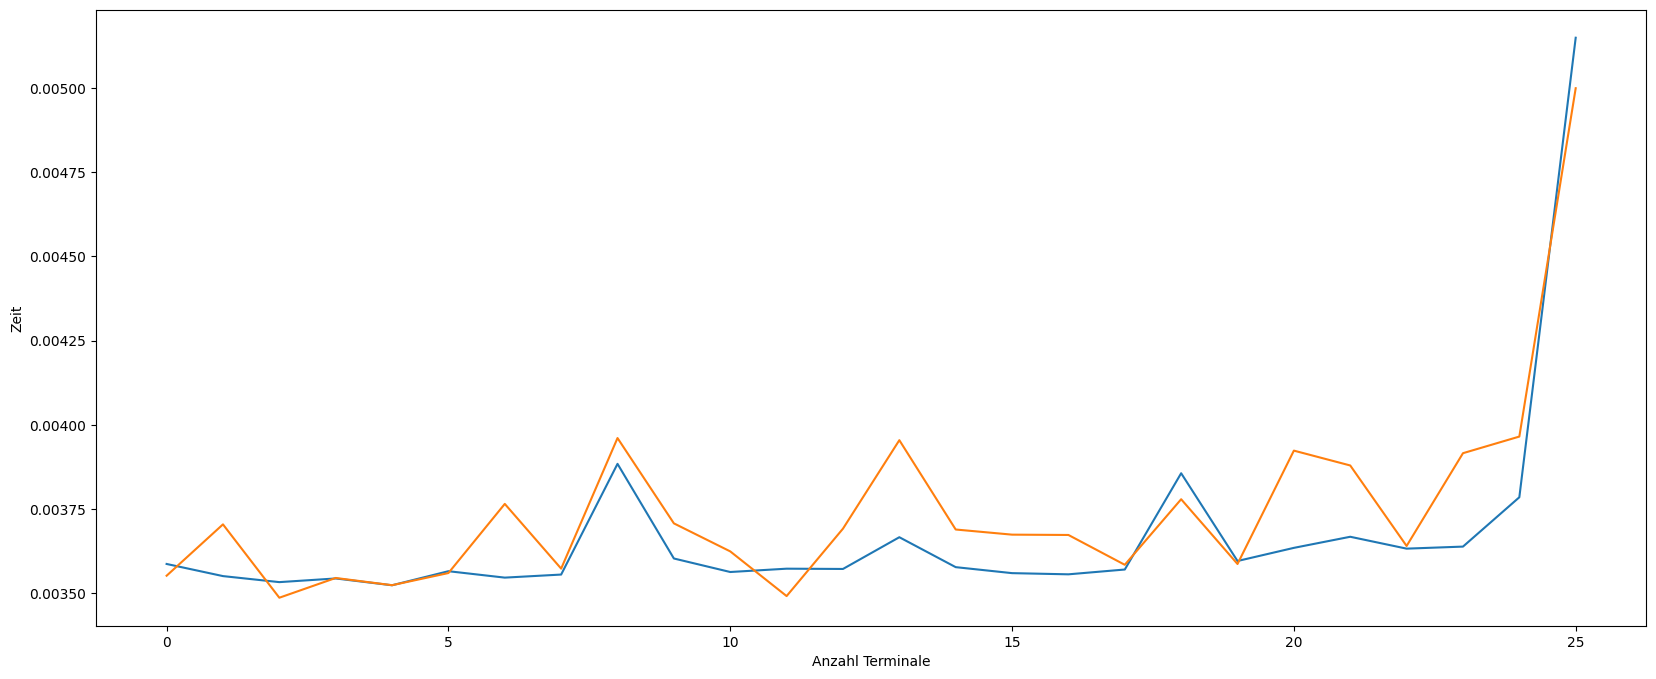

In [78]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeVariableTerminalsMean)
plt.plot(timeVariableTerminalsMedian)
plt.xlabel('Anzahl Terminale')
plt.ylabel('Zeit')
plt.show()

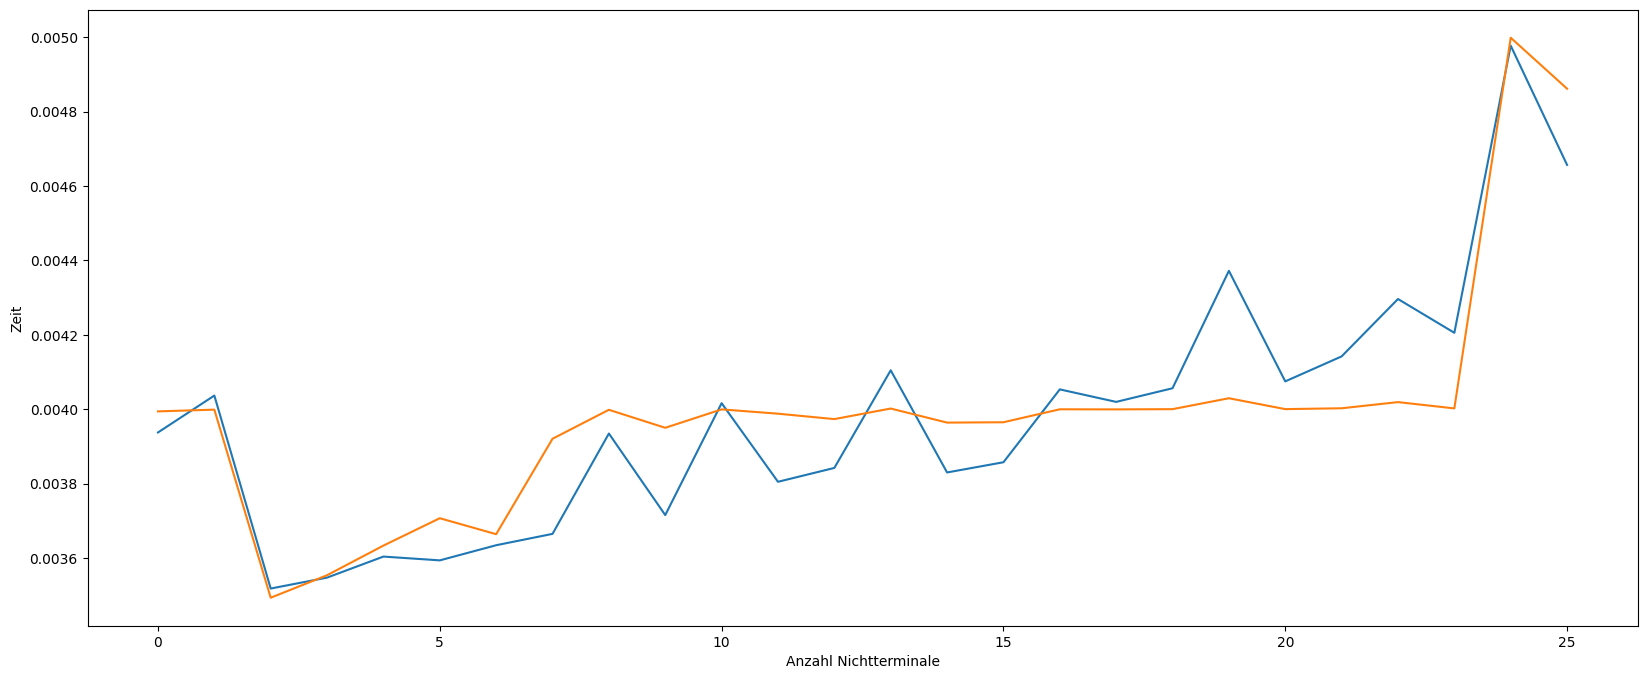

In [79]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeVariableNonTerminalsMean)
plt.plot(timeVariableNonTerminalsMedian)
plt.xlabel('Anzahl Nichtterminale')
plt.ylabel('Zeit')
plt.show()

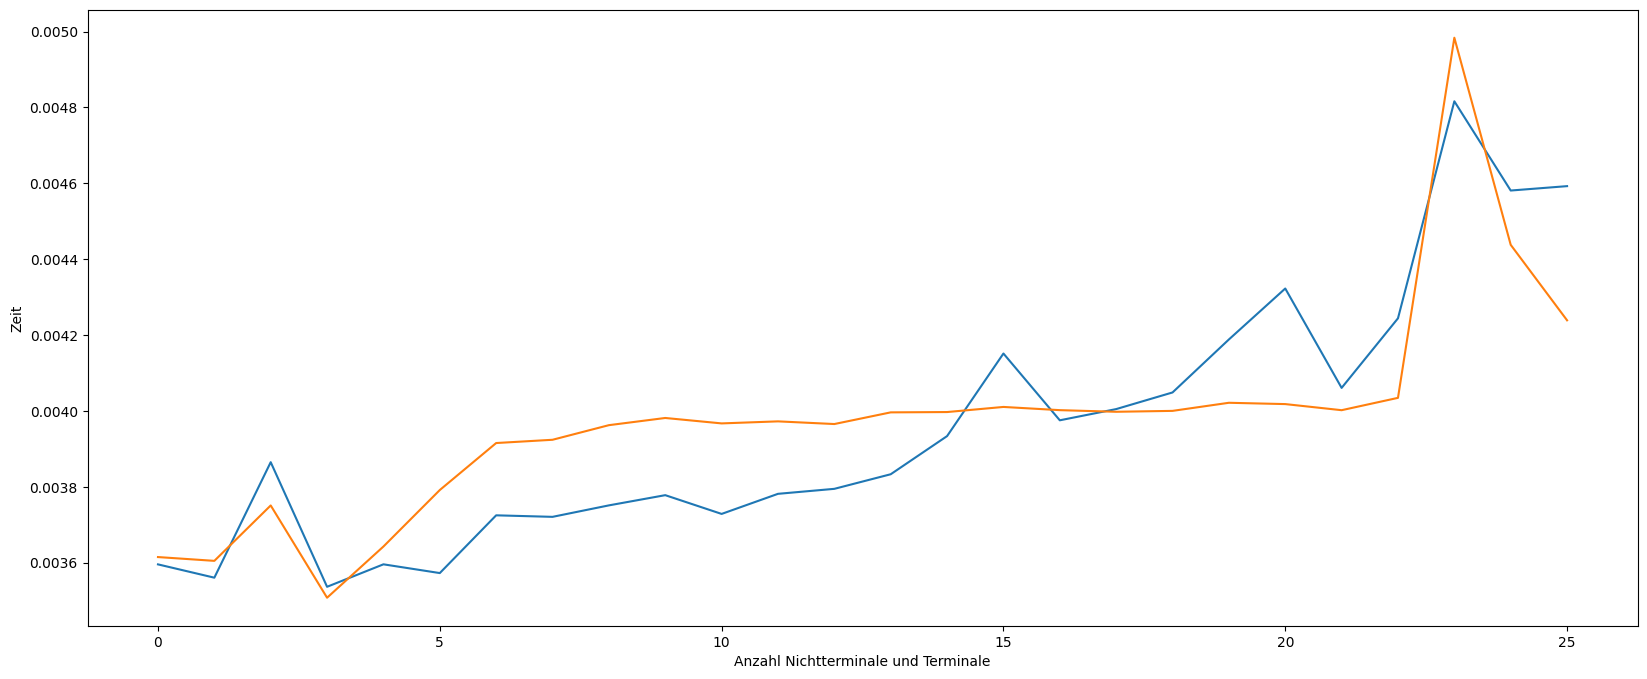

In [80]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeBothVariableMean)
plt.plot(timeBothVariableMedian)
plt.xlabel('Anzahl Nichtterminale und Terminale')
plt.ylabel('Zeit')
plt.show()

In [ ]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(productionsVariableNonTerminals)
plt.plot(productionsVariableTerminals)
plt.plot(productionsVariableBoth)
plt.xlabel('Anzahl Nichtterminale bzw. Terminale')
plt.ylabel('Anzahl Produktionen bei variablen Nichtterminalen')
plt.show()
